**Aluno:** João Francisco Barreto da Silva Martins <<joaofbsm@dcc.ufmg.br>>

**Matrícula:** 2018718120

# Introdução

Processamento de Linguagem Natural, também conhecida pelo acrônimo do termo em inglês, NLP, é uma subárea da ciência da computação e da inteligência artificial que se preocupa com a interação de computadores e conteúdo linguístico produzido por humanos, seja ele falado ou escrito.

Apesar de estudos em NLP remontarem há pelo menos 50 anos, recentemente, com a revolução do aprendizado profundo na área de aprendizado de máquina, houveram muitas inovações extremamente importantes, como a criação de redes neurais recursivas e modelos vetoriais de representação de palavras, como Word2Vec \[1\] e GloVe. 

Neste trabalho iremos produzir diversos modelos Word2Vec usando as arquiteturas Skip-Gram e CBOW e levando em consideração um corpus adquirido em http://mattmahoney.net/dc/text8.zip. Cada modelo criado possuirá uma combinação única de parâmetros a fim de avaliarmos experimentalmente qual o melhor deles para este corpo de texto. Os detalhes técnicos e experimentais do desenvolvimento deste trabalho serão apresentados ao longo deste documento.



# Modelagem e Implementação

## Bases de Dados

Como dito na seção de introdução, o corpus utilizado foi retirado de http://mattmahoney.net/dc/text8.zip. 

Os dados utilizados para validação foram retirados do documento _question-words.txt_ presente no repositório do Word2Vec do Google \[2\]. Este arquivo contém uma série de perguntas de analogia, separadas por categorias, e no formato "Se A está para B, C está para D", em cima das quais o modelo gerado tem que prever a palavra D ao subtrair o vetor de A do vetor de B e somar o resultado ao vetor de C.

## Implementação

A implementação mais conhecida do Word2Vec é em C e feita pelo time do Google Brain \[2\]. No entanto, escolhemos implementar o trabalho todo em Python3, que, além de ser uma linguagem de alto nível e fácil de utilizar, possui a biblioteca **gensim**, pronta para lidar com a maioria das tarefas de NLP de forma simples e eficiente. 

O código como um todo é bem simples. As formas de avaliação dos modelos usadas foram a acurácia média, obtida com a função `evaluate_word_analogies()` da biblioteca gensim e distância do cosseno média entre as palavras preditas e as esperadas, implementada na função `evaluate_analogies_distance()`. Em ambas as avaliações, palavras fora do vocabulários foram desconsideradas.

O corpus usado já está totalmente tratado, então só foi necessária uma função - `split_corpus_file()` - para que ele fosse quebrado nos tamanhos necessários para experimentação. Essa função só precisa ser executada uma vez, já que os corpus de tamanhos diferentes são salvos em arquivos separados. O único tratamento textual necessário neste trabalho prático, feito na função `prepare_validation_file()`, foi o do conjunto de dados de validação, o qual precisa de ter suas categorias retiradas e suas palavras transformadas para _lowercase_, para evitar conflitos no cálculo da distância.

## Execução do Código

### Treinamento

Para treinar os modelos, devemos chamar o script `train.py`. Os parâmetros a serem variados já estão descritos no script, então só precisamos de passar dois argumentos na chamada como a seguir:

```
python3 train.py /path/to/corpus/file /path/to/models/dir/
```

### Teste

Para avaliar os modelos treinados, devemos chamar o script `test.py`. Os testes são executados sequencialmente em todos os arquivos de modelos e salvos na pasta de resultados passada como um dos argumentos na chamada:

```
python3 test.py /path/to/validation/file /path/to/models/dir/ /path/to/results/dir/
```

# Análise Experimental

## Parâmetros

Os parâmetros variados foram:

* Tamanho do corpus: 25%, 50%, 75% e 100% do corpus original.
* Tamanho do contexto: 5, 10, 20 e 100 palavras.
* Arquitetura: CBOW ou Skip-Gram.

Ao realizarmos todas as combinações possíveis de parâmetros acabamos com 32 combinações únicas.

## Avaliação de Modelos

Nossos modelos foram avaliados em termos da acurácia média nos dados de validação e da distância do cosseno média entre as palavras preditas para cada pergunta e as palavras esperadas (respostas corretas).

### Criação DataFrame

In [1]:
import os
import pandas as pd

pd.set_option("display.max_rows", 64)  # Total number of rows

# Data dictionary to convert to pandas DataFrame
data = {
        'corpus_proportion': [],
        'context_size': [],
        'measure_type': [],
        'measure_value': []
}

# Execution parameters
corpus_proportions = ('0.25', '0.5', '0.75', '1')
context_sizes = ('5', '10', '20', '100')
training_algorithms = {'cbow': 'CBOW', 'sg': 'Skip-Gram'}

# Read files and populate data dictionary
for cp in corpus_proportions:
    for cs in context_sizes:
        for ta in training_algorithms.keys():
            
            with open('../results/{}-{}-{}.txt'.format(cp, cs, ta), 'r') as f:
                for line in f.readlines():
                    if line.startswith('accuracy'):
                        accuracy = line.split('=')[1][:-1]  # [:-1] to remove trailing '\n'
                        
                        data['corpus_proportion'].append(cp)
                        data['context_size'].append(cs)
                        data['measure_type'].append(training_algorithms[ta] + ' accuracy')
                        data['measure_value'].append(float(accuracy))
                    elif line.startswith('distance'):
                        distance = line.split('=')[1]
                        
                        data['corpus_proportion'].append(cp)
                        data['context_size'].append(cs)
                        data['measure_type'].append(training_algorithms[ta] + ' distance')
                        data['measure_value'].append(float(distance))

# Create pandas DataFrame and order columns
df = pd.DataFrame(data)[['corpus_proportion', 'context_size', 'measure_type', 'measure_value']]

# Force context_size to be ordered for a correct plot with facet_wrap
df['context_size'] = pd.Categorical(df['context_size'], categories=['5', '10', '20', '100'], ordered=True)

df

,corpus_proportion,context_size,measure_type,measure_value
0,0.25,5,CBOW accuracy,0.058151
1,0.25,5,CBOW distance,0.805950
2,0.25,5,Skip-Gram accuracy,0.092193
3,0.25,5,Skip-Gram distance,0.570380
4,0.25,10,CBOW accuracy,0.058032
5,0.25,10,CBOW distance,0.857400
6,0.25,10,Skip-Gram accuracy,0.110200
7,0.25,10,Skip-Gram distance,0.634700
8,0.25,20,CBOW accuracy,0.059049
9,0.25,20,CBOW distance,0.812040


### Plots

#### Estilo do plot

In [2]:
import plotnine as pn

FONT = 'Roboto'
FONT_SIZE = 12
TEXT_COLOR = '#767676'

def theme_nlp():
    return (pn.theme_bw(base_size=FONT_SIZE, base_family=FONT)
            + pn.theme(axis_text_x = pn.element_text(color=TEXT_COLOR),
                       strip_background = pn.element_blank(),
                       legend_key = pn.element_blank(),
                       legend_title = pn.element_text(size=FONT_SIZE, margin={'b': 14}, weight='bold')
                      )
            )

#### Plot geral

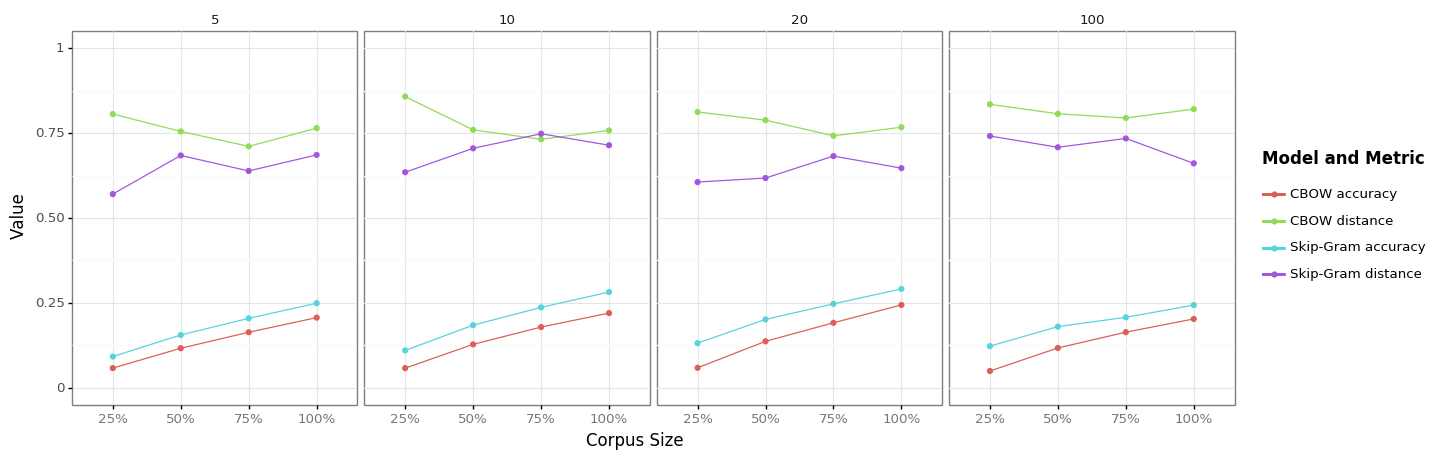

<ggplot: (-9223372036555990987)>

In [3]:
import warnings
from plotnine import *

warnings.filterwarnings('ignore')

pn.options.figure_size = (15, 15)

(ggplot(df)
 + aes(x='corpus_proportion', y='measure_value', group='measure_type', color='measure_type')
 + facet_wrap('context_size', nrow=1)
 + labs(x='Corpus Size', y='Value', color='Model and Metric')
 + geom_line()
 + geom_point()
 + scale_x_discrete(labels=['25%', '50%', '75%', '100%'])
 + scale_y_continuous(limits=[0, 1])
 + coord_fixed(ratio=5)
 + theme_nlp()
)

### Análise

O gráfico acima está agrupado por tamanhos de contexto. Com a exceção da distância média quando temos um contexto de tamanho 10 e 75% do corpus, a arquitetura Skip-Gram predominou em todos os resultados, para ambas as métricas de avaliação. Buscamos idealmente uma maior acurácia e uma menor distância.

Apesar de a métrica de distância do cosseno média piorar a medida que o corpus aumenta, já que agora temos mais palavras não corretas que podemos predizer, o comportamento da acurácia média não é tão facilmente sumarizado. Em geral temos os piores valores para corpus pequenos, já que o modelo não consegue aprender de forma satisfatória. Essa acurácia tende a crescer para corpus de 50% e 75% do original, porém acaba sendo pior na maioria dos casos quando usamos o corpus completo.

É interessante notar que os autores do algoritmo Word2Vec recomendam um tamanho de contexto igual a 5 para a arquitetura CBOW e 10 para Skip-Gram \[2\]. Perceba que os valores são pequenos, e que a medida que aumentamos o contexto a distância média das predições vai piorando, exceto para o contexto de tamanho 100, no qual, incrivelmente temos melhores resultados do que para casos anteriores (com exceção do tamanho 5). Esse comportamento é de certa forma contra-intuitivo e difícil de explicar.

Os melhores resultados tanto para acurácia média quanto para distância média foram alcançados com um contexto de tamanho 5, 25% do corpus e arquitetura Skip-Gram.

# Conclusão

Com este trabalho buscamos aprender um pouco a respeito da construção de modelos vetoriais para representação de palavras ao usarmos o algoritmo Word2Vec com as arquiteturas CBOW e Skip-Gram para construção dos modelos. Ao todo foram construídos 32 modelos, cada um com uma combinação diferente de parâmetros para o tamanho do corpus, o tamanho do contexto e a arquitetura utilizada.

A arquitetura que predominou em quase todos os casos foi a Skip-Gram. Com a exceção da distância média quando temos um contexto de tamanho 10 e 75% do corpus, a arquitetura Skip-Gram predominou em todos os resultados, para ambas as métricas de avaliação. Os melhores resultados tanto para acurácia média quanto para distância média foram alcançados com um contexto de tamanho 5, 25% do corpus e arquitetura Skip-Gram.

Uma futura comparação do tempo de execução dos modelos com as ambas as arquiteturas pode nos mostrar se há um trade-off entre qualidade e custo computacional, para nos ajudar a escolher um modelo.

# Referências

\[1\] Mikolov, T., Sutskever, I., Chen, K., Corrado, G. S., & Dean, J. (2013). Distributed representations of words and phrases and their compositionality. In Advances in neural information processing systems (pp. 3111-3119).

\[2\] https://code.google.com/archive/p/word2vec/. Acessado em: 01/10/2018